In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import pandas_profiling as pp
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df=pd.read_csv(r"D:\Datasets\Train_test_linux\Train_Test_Linux_disk.csv")
# profile=pp.ProfileReport(df)
# profile.to_file("linux_disk.html")

In [3]:
df.drop(['ts','type'],axis=1,inplace=True)

label_encoder=preprocessing.LabelEncoder()
df['CMD']=label_encoder.fit_transform(df['CMD'])
#df['type']=label_encoder.fit_transform(df['type'])

x=df.loc[:,['PID','RDDSK','WRDSK','WCANCL','DSK','CMD']] # input
y=df.loc[:,['label']] # target

# splitting thee dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [4]:
gnb=GaussianNB()
model=gnb.fit(x_train,y_train.values.ravel())
y_pred=model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

gprecision, grecall, thresholds = precision_recall_curve(y_test, y_pred)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

# #display plot
# # plt.show()
# plt.savefig('disk_guassian.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  0.6360702835491527
Recall:  0.6360702835491527
F1score:  0.5111882800753296


In [5]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train.values.ravel())
y_pred=mnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred,average="weighted"))
print("F1 score: ",f1_score(y_test,y_pred,average="weighted"))

mprecision, mrecall, thresholds = precision_recall_curve(y_test, y_pred)

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

# #display plot
# # plt.show()
# plt.savefig('disk_multinomial.jpg', bbox_inches='tight', facecolor='white')

Accuracy:  0.6123162759711871
Recall:  0.6123162759711871
F1 score:  0.608318505355686


In [4]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rfc.fit(x_train,y_train.values.ravel())
# y_pred=rfc.predict(x_test)
#y_pred = rfc.predict_proba(x_test)[:, 1]
# print(y_test)
# print(y_pred)
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

# rprecision, rrecall, thresholds = precision_recall_curve(y_test, y_pred)

y_pred_random=rfc.predict(x_test)
y_score_random = rfc.predict_proba(x_test)[:, 1]

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

# #display plot
# # plt.show()
# plt.savefig('thermostat_random.jpg', bbox_inches='tight', facecolor='white')

In [5]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100, random_state=42, max_depth=10)
xgb_classifier.fit(x_train,y_train.values.ravel())
y_pred_xgb=xgb_classifier.predict(x_test)

# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

# xprecision, xrecall, thresholds = precision_recall_curve(y_test, y_pred)


y_score_xgb = xgb_classifier.predict_proba(x_test)[:, 1]

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

# #display plot
# # plt.show()
# plt.savefig('thermostat_xgb.jpg', bbox_inches='tight', facecolor='white')

In [6]:
model = MLPClassifier(max_iter=100, random_state=42)
model.fit(x_train, y_train.values.ravel())
y_pred_mlp=model.predict(x_test)

# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

# mlprecision, mlrecall, thresholds = precision_recall_curve(y_test, y_pred)

y_score_mlp = model.predict_proba(x_test)[:, 1]

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

# #display plot
# # plt.show()
# plt.savefig('thermostat_mlp.jpg', bbox_inches='tight', facecolor='white')

In [7]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
# Train Adaboost Classifer
model1 = abc.fit(x_train, y_train.values.ravel())
#Predict the response for test dataset
y_pred_abc = model1.predict(x_test)

# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

# aprecision, arecall, thresholds = precision_recall_curve(y_test, y_pred)

y_score_abc = model1.predict_proba(x_test)[:, 1]

# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

# #display plot
# # plt.show()
# plt.savefig('thermostat_adaboost.jpg', bbox_inches='tight', facecolor='white')

In [8]:
clf=DecisionTreeClassifier()
#Training a Decision Tree Classifer
clf.fit(x_train,y_train.values.ravel())
#Predicting the response for test dataset
y_pred_decision=clf.predict(x_test)
# # splitting thee dataset into training and testing sets
# dprecision, drecall, thresholds = precision_recall_curve(y_test, y_pred)

y_score_decision = clf.predict_proba(x_test)[:, 1]

In [9]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train,y_train.values.ravel())
y_pred_knn=classifier.predict(x_test)
# kprecision, krecall, thresholds = precision_recall_curve(y_test, y_pred)
y_score_knn = classifier.predict_proba(x_test)[:, 1]

In [12]:
clf=QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train.values.ravel())
y_pred=clf.predict(x_test)
qprecision, qrecall, thresholds = precision_recall_curve(y_test, y_pred)

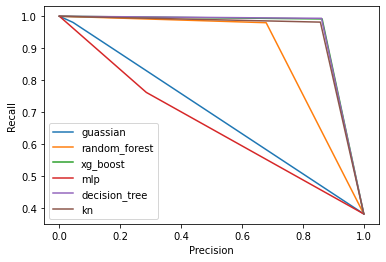

In [10]:
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(grecall,gprecision,label='guassian')
# plt.plot(mrecall,mprecision,label='multinomial')
plt.plot(rrecall,rprecision,label='random_forest')
plt.plot(xrecall,xprecision,label='xg_boost')
plt.plot(mlrecall,mlprecision,label='mlp')
# plt.plot(arecall,aprecision,label='ada_boost')
plt.plot(drecall,dprecision,label='decision_tree')
plt.plot(krecall,kprecision,label='kn')
# plt.plot(qrecall,qprecision,label='quadratic')
plt.legend()
plt.show()

In [14]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score_random)
precision2, recall2, _ = precision_recall_curve(y_test, y_score_xgb)
precision3, recall3, _ = precision_recall_curve(y_test, y_score_mlp)
precision4, recall4, _ = precision_recall_curve(y_test, y_score_decision)
precision5, recall5, _ = precision_recall_curve(y_test, y_score_knn)
precision6, recall6, _ = precision_recall_curve(y_test, y_score_abc)

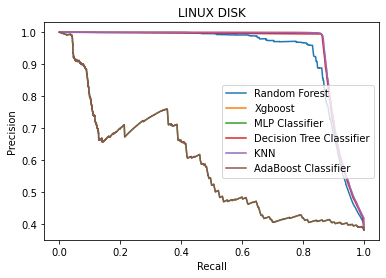

In [15]:
plt.plot(recall1, precision1, label='Random Forest')
plt.plot(recall2, precision2, label='Xgboost')
plt.plot(recall3, precision3, label='MLP Classifier')
plt.plot(recall4, precision4, label='Decision Tree Classifier')
plt.plot(recall2, precision2, label='KNN')
plt.plot(recall3, precision3, label='AdaBoost Classifier')
plt.title("LINUX DISK")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [12]:
plt.savefig('linux_disk_binary.png')

<Figure size 432x288 with 0 Axes>

In [16]:
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_random)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_xgb)
precision3, recall3, _ = precision_recall_curve(y_test, y_pred_mlp)
precision4, recall4, _ = precision_recall_curve(y_test, y_pred_decision)
precision5, recall5, _ = precision_recall_curve(y_test, y_pred_knn)
precision6, recall6, _ = precision_recall_curve(y_test, y_pred_abc)

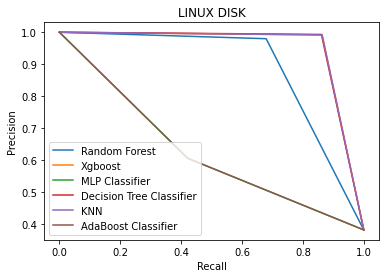

In [18]:
plt.plot(recall1, precision1, label='Random Forest')
plt.plot(recall2, precision2, label='Xgboost')
plt.plot(recall3, precision3, label='MLP')
plt.plot(recall4, precision4, label='Decision Tree')
plt.plot(recall2, precision2, label='KNN')
plt.plot(recall3, precision3, label='AdaBoost Classifier')
plt.title("LINUX DISK")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()